In [15]:
import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pyplot as plt
plt.style.use('ggplot')

np.random.seed(42)

#### Глава 2
##### Как описать данные

**2.1** 

Найдите среднее, стандартное отклонение, медиану, 25-й и 75-й процентили для следующей выборки 0; 0; 0; 1; 1; 1; 1; 1; 1; 1; 1; 1; 1; 1; 2; 2; 2; 2; 3; 3; 3; 3; 4; 4; 5; 5; 5; 5; 6; 7; 9; 10; 11. Можно  ли  считать,  что  выборка  извлечена  из  совокупности  с нормальным  распределением?  Обоснуйте  свой  ответ.  (Приведенные числа — клинические оценки тяжести серповидноклеточной анемии. Подробный анализ этого исследования см. в задаче 8.9. Данные заимствованы из работы: R. Hebbel et al. Erythrocyte  adherence  to  endothelium  in  sickle-cell  anemia:  a  possible determinant of disease seventy. N. Engl. J. Med., 302, 992–995, 1980).

In [16]:
inp = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 7, 9, 10, 11])

mean, sd = np.mean(inp), np.std(inp, ddof=1)

print(f"Среднее: {mean:.3f}")
print(f"Стандартное отклонение: {sd:.3f}") # 
print(f"Медиана: {np.median(inp):.3f}")
print(f"25-й процентиль: {np.percentile(inp, 25, method='lower'):.3f}")
print(f"75-й процентиль: {np.percentile(inp, 75, method='lower'):.3f}")


Среднее: 3.091
Стандартное отклонение: 2.887
Медиана: 2.000
25-й процентиль: 1.000
75-й процентиль: 5.000


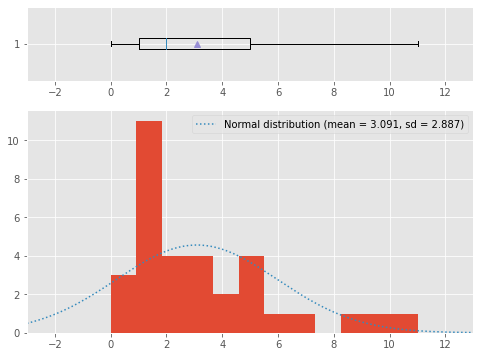

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [1, 3]})

axs[0].boxplot(inp, vert=False, showmeans=True);

axs[1].hist(inp, bins=12);
axs[1].plot(
        x_axis:=np.arange(-3, 13, 0.1), 
        norm.pdf(x_axis, mean,sd)*inp.size,
        linestyle=":",
        label=f"Normal distribution (mean = {mean:.3f}, sd = {sd:.3f})"
    )

for ax in axs: ax.set_xlim(-3,13);

axs[1].legend()

Нельзя считать, что выборка извлечена из совокупности с нормальным распределением. Причины:
* среднее и медиана сильно отличаются;
* распределение ассиметрично, медиана смещена всторону 25 процентиля;
* посокльку среднее приблизительно равно стандартному отклонению,то примерно 15% значение должны лежать ниже нуля, но в выборке отрицательных значений нет совсем.

**2.2** 

Найдите среднее, стандартное отклонение, медиану, 25-й и 75-й процентили для следующих данных 289, 203, 359, 243, 232,  210,  251,  246,  224,  239,  220,  211.  Можно  ли  считать,  что выборка извлечена из совокупности с нормальным распределением? Обоснуйте свой ответ. (Эти числа — продолжительность (в секундах) физической нагрузки до развития приступа стенокардии у 12 человек с ишемической болезнью сердца. Данные заимствованы  из работы: W. Aronow. Effect of nonnicotine cigaretts and carbon monoxide on angina. Circulation, 61:262–265, 1979. Более подробно эта работа описана в задаче 9.5.)

In [18]:
inp = np.array([289, 203, 359, 243, 232,  210,  251,  246,  224,  239,  220,  211])

print(f"Среднее: {np.mean(inp):.3f}")
print(f"Стандартное отклонение: {np.std(inp, ddof=1):.3f}")
print(f"Медиана: {np.median(inp):.3f}")
print(f"25-й процентиль: {np.percentile(inp, 25, method='lower'):.3f}")
print(f"75-й процентиль: {np.percentile(inp, 75, method='lower'):.3f}")

Среднее: 243.917
Стандартное отклонение: 43.038
Медиана: 235.500
25-й процентиль: 211.000
75-й процентиль: 246.000


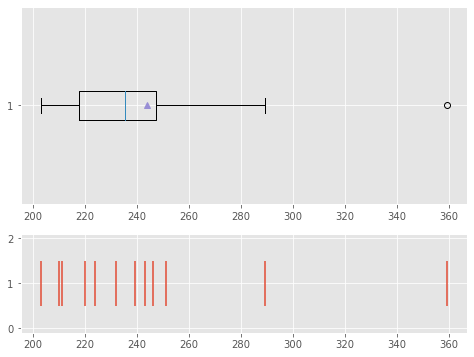

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [2, 1]})

axs[0].boxplot(inp, vert=False, showmeans=True);

axs[1].eventplot(inp);

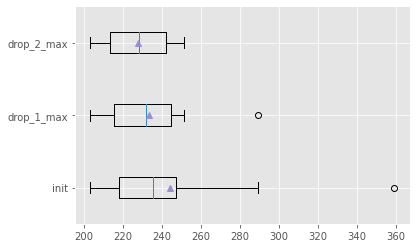

In [20]:
plt.boxplot([
        inp,
        [289, 203, 243, 232,  210,  251,  246,  224,  239,  220,  211], 
        [203, 243, 232,  210,  251,  246,  224,  239,  220,  211]
    ],
    vert=False, showmeans=True);
plt.yticks([1,2,3], ["init", "drop_1_max", "drop_2_max"]);

На первый взгляд выборка не принадлежит совокупности с нормальным распределением, хотя медиана близка к срднему. Однако если убрать выбросы то вполне можно согласиться с тем, что выборка может быть взята из совокупности с нормальным распределением.

**2.3.**

Найдите среднее, стандартное отклонение, медиану, 25-й и 75-й процентили для следующих данных 1,2; 1,4; 1,6; 1,7; 1,7; 1,8; 2,2; 2,3; 2,4; 6,4; 19,0; 23,6. Можно ли считать, что это —  выборка  из  совокупности  с  нормальным  распределением? Обоснуйте свой ответ. (Приведены результаты оценки проницаемости сосудов сетчатки из работы: G. A. Fishman et al. Bloodretinal barrier function in patients with cone or cone-rod dystrophy. Arch. Ophthalmol., 104:545–548, 1986.)

In [21]:
inp = np.array([1.2, 1.4, 1.6, 1.7, 1.7, 1.8, 2.2, 2.3, 2.4, 6.4, 19.0, 23.6])

print(f"Среднее: {np.mean(inp):.3f}")
print(f"Стандартное отклонение: {np.std(inp, ddof=1):.3f}")
print(f"Медиана: {np.median(inp):.3f}")
print(f"25-й процентиль: {np.percentile(inp, 25, method='lower'):.3f}")
print(f"75-й процентиль: {np.percentile(inp, 75, method='lower'):.3f}")

Среднее: 5.442
Стандартное отклонение: 7.595
Медиана: 2.000
25-й процентиль: 1.600
75-й процентиль: 2.400


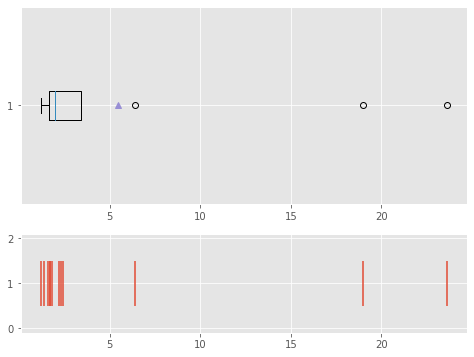

In [22]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [2, 1]})

axs[0].boxplot(inp, vert=False, showmeans=True);

axs[1].eventplot(inp);

Выборку нельзя считать извлеченной из нормально распределенной совокупности.

Среднее значительно больше медианы и даже превышает 75-й процентиль, кроме того, стандартное отклонение больше среднего, но отрицательные величины в выборке отсутствуют.

**2.4.**

Опишите распределение числа очков, выпадающих при бросании игральной кости. Найдите среднее число очков.

Это дискретное равномерно распределенная случайная величина в диапазоне от 1 до 6. Среднее число очков = 3,5.

**2.5.**

Бросьте одновременно две игральные кости, посмотрите, сколько очков выпало на каждой из них, и рассчитайте среднее.  Повторите  опыт  20  раз  и  постройте  распределение  средних, найденных после каждого броска. Что это за распределение? Вычислите его среднее и стандартное отклонение. Что они
характеризуют?

Это распределение выборочных средних, вычисленных по выборкам объема 2, извлеченных из равномерно распределенной случайной величины в диапазоне от 1 до 6 (мат ожидание 3.5, стандартное отклонение $\sigma=\sqrt{(n^2 - 1)/12} = 1,707825128$).

Т.о. у распределения истинные значения среднего 3.5, а стандартного отклонения $1,707825128 / \sqrt{2} = 1,207614729$

Проверка:

Среднее = 3.85
Стандарное отклонение = 1.0772772696894117


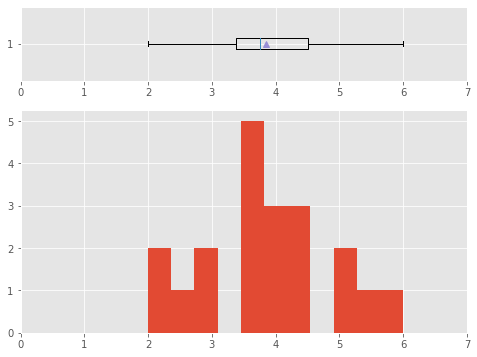

In [23]:
inp = np.random.randint(1, 7, (2, 20)).mean(0)

print(f"Среднее = {inp.mean()}\nСтандарное отклонение = {inp.std(ddof=1)}")

fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [1, 3]})

axs[0].boxplot(inp, vert=False, showmeans=True);

axs[1].hist(inp, bins=11);

for ax in axs: ax.set_xlim(0,7);

Доп.
Увеличим число опытов.

,mean,std
n,,
20,3.42500,1.206070
100,3.31500,1.093265
10000,3.49895,1.214052


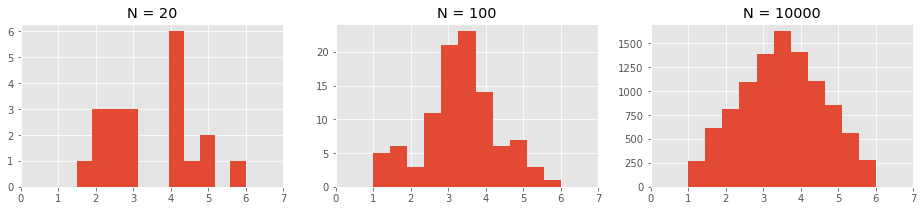

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(16, 3))

data = []

for i, n in enumerate([20, 100, 10000]):
    inp = np.random.randint(1, 7, (2, n)).mean(0)
    data.append([n, inp.mean(), inp.std(ddof=1)])

    axs[i].hist(inp, bins=11, label="asd");
    axs[i].set_title(f"N = {n}");
    axs[i].set_xlim(0,7);



df = pd.DataFrame(data, columns=["n", "mean", "std"]).set_index("n")

display(df)

**2.6.**

Р. Флетчер и С. Флетчер (R. Fletcher, S. Fletcher. Clinical research in general medical journals: a 30-year perspective. N. Engl. J. Med., 301:180–183, 1979) изучили библиографические характеристики 612 случайно выбранных статей, опубликованных в журналах Journal of American Medical Association, New England Journal of Medicine и Lancet с 1946 г. Одним из показателей было число авторов статьи. Было установлено следующее:

|Год|Число обследованных статей|Среднее число авторов|Стандартное отклонение|
|-|-|-|-|
|1946|151|2,0|1,4|
|1956|149|2,3|1,6|
|1966|157|2,8|1,2|
|1976|155|4,9|7,3|

Нарисуйте график среднего числа авторов по годам. Может ли распределение статей по числу авторов быть нормальным?
Почему?


In [25]:
 df = pd.DataFrame(
        [[1946, 151, 2, 1.4], 
        [1956, 149, 2.3, 1.6], 
        [1966, 157, 2.8, 1.2],  
        [1976, 155, 4.9, 7.3]], 
        columns=["year", "n_articles", "mean_authors", "std"])\
    .set_index("year")

# доп.
# стандартная ошибка среднего
df["SE"] = df["std"] / df["n_articles"]**.5

display(df)

,n_articles,mean_authors,std,SE
year,,,,
1946,151,2.0,1.4,0.113930
1956,149,2.3,1.6,0.131077
1966,157,2.8,1.2,0.095770
1976,155,4.9,7.3,0.586350


<ErrorbarContainer object of 3 artists>

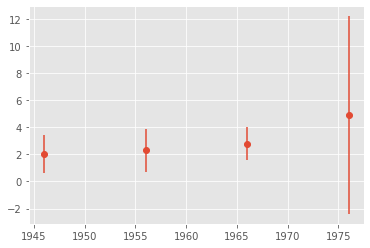

In [26]:
fig, ax = plt.subplots()

ax.errorbar(x=df.index, y=df["mean_authors"], yerr=df["std"], fmt='o')

Распределение статей по числу авторов не может быть нормальным:
* нормальное распределение - непрерывное, в то время как данное распределение - дискретное.
* отрицательного числа авторов в статье быть не может, но при этом среднее число авторов меньше удвоенного стандартного отклонения (в 1976 даже меньше просто стандартного отклонения). Это распределение ассиметрично.


Распределение статей по числу авторов дискретное и ассиметричное.